In [1]:
# Import libraries

import pandas as pd
import numpy as np
import math

# Import curve-fitting package from scipy
from scipy.optimize import curve_fit
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt
import seaborn as sns

import os
import osmnx as ox
import contextily as ctx

%matplotlib inline

### Messing around plotting data and baselayers
#### With focus here, for now, in Carteret Co (NC) – "Downeast"

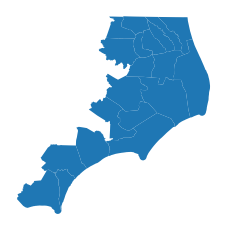

In [2]:
places = ["Beaufort County, North Carolina, USA",
          "Bertie County, North Carolina, USA",
          "Brunswick County, North Carolina, USA",
          "Camden County, North Carolina, USA",
          "Carteret County, North Carolina, USA",
          "Chowan County, North Carolina, USA",
          "Craven County, North Carolina, USA",
          "Currituck County, North Carolina, USA",
          "Dare County, North Carolina, USA",
          "Gates County, North Carolina, USA",
          "Hertford County, North Carolina, USA",
          "Hyde County, North Carolina, USA",
          "New Hanover County, North Carolina, USA",
          "Onslow County, North Carolina, USA",
          "Pamlico County, North Carolina, USA",
          "Pasquotank County, North Carolina, USA",
          "Pender County, North Carolina, USA",
          "Perquimans County, North Carolina, USA",
          "Tyrrell County, North Carolina, USA",
          "Washington County, North Carolina, USA"
         ]

NCstate = ox.geocode_to_gdf(places)
NCstate = ox.project_gdf(NCstate)
ax = NCstate.plot()
_ = ax.axis('off')

In [3]:
# Multiple counties taking ages to load, so pull drivable road networks for single county

Carteret = ["Carteret County, North Carolina, USA"]

# Dare = ox.geocode_to_gdf(Dare)
# Dare = ox.project_gdf(Dare)
# ax = Dare.plot()
# _ = ax.axis('off')

G = ox.graph_from_place(Carteret, network_type='drive', simplify = True)

fig, ax = ox.plot_graph(G, bgcolor='white', edge_color='black', node_color='black', edge_linewidth=0.25, node_size=20)


KeyboardInterrupt: 

In [4]:
# Load TIMS dataset as new dataframe

incidents = pd.read_csv('Incidents.csv', encoding='ISO-8859-1') # encoding fixes a load error

incidents.head(5) # check dataframe

,AuditId,IncidentID,DateStamp,StartTime (EST),EndTime (EST),RoadName,Suffix,CommonName,Direction,CrossStreetName,...,Detour,CreatedOn (EST),Project,WeightLimit,Width,HeightFt,HeightIn,CreatedFromConcurrent,MovableConstruction,WorkZoneSpeedLimit
0,2077206,641402,9/10/2022 2:43:45 AM,9/10/2022 2:32:00 AM,9/10/2022 7:30:00 AM,US-64,ALT,W Main Street,Both Directions,NaN,...,NaN,9/10/2022 2:43:45 AM,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
1,2077205,641402,9/10/2022 2:41:18 AM,9/10/2022 2:32:00 AM,9/10/2022 3:32:00 AM,US-64,ALT,W Main Street,Both Directions,NaN,...,NaN,9/10/2022 2:41:18 AM,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
2,2077001,641333,9/9/2022 10:05:35 AM,9/9/2022 8:40:00 AM,9/9/2022 10:05:35 AM,US-17,NaN,Market Street,Both Directions,SR-1403,...,NaN,9/9/2022 10:05:35 AM,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
3,2076984,641333,9/9/2022 8:37:53 AM,9/9/2022 8:40:00 AM,9/9/2022 11:33:00 AM,US-17,NaN,Market Street,Both Directions,SR-1403,...,NaN,9/9/2022 8:37:53 AM,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
4,2076573,641172,9/7/2022 8:34:40 PM,9/7/2022 3:51:00 PM,9/7/2022 8:34:40 PM,NC-24,NaN,NaN,Heading East,NaN,...,Motorists are to take Underwood Rd to re-acces...,9/7/2022 8:34:40 PM,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


In [5]:
# Reorganise column sequence for tidiness, drop all other columns
cols = ['AuditId',
        'IncidentID',
        'DateStamp',
        'RoadName',
        'County',
        'Latitude',
        'Longitude',
        'Expected Impact to Traffic',
        'Incident Type',
        'EventName',
        'Reason']

incidents = incidents[cols]

incidents.drop(incidents.loc[incidents['Latitude']==0].index, inplace=True) # drop stray (0,0) point

incidents.head(3) # check header

,AuditId,IncidentID,DateStamp,RoadName,County,Latitude,Longitude,Expected Impact to Traffic,Incident Type,EventName,Reason
0,2077206,641402,9/10/2022 2:43:45 AM,US-64,Martin,35.833967,-77.173086,High,Road Obstruction,None,One lane is closed near Church Street due to d...
1,2077205,641402,9/10/2022 2:41:18 AM,US-64,Martin,35.833967,-77.173086,High,Road Obstruction,None,One lane is closed near Church Street due to d...
2,2077001,641333,9/9/2022 10:05:35 AM,US-17,New Hanover,34.271862,-77.819402,High,Road Obstruction,None,The road has reopened near Middle Sound Loop R...


In [6]:
CarteretDF = incidents.loc[incidents['County']=='Carteret'] # isolate incidents in Carteret only

In [ ]:
# fig, ax = plt.subplots()
# ax.scatter(Dare.Longitude, Dare.Latitude, zorder=1, alpha= 0.2, c='b', s=10)

In [ ]:
# fig, ax = plt.subplots(figsize = (10,10))
# ax.scatter(incidents.Longitude, incidents.Latitude, zorder=1, alpha= 0.2, c='b', s=10)

NameError: name 'DareDF' is not defined

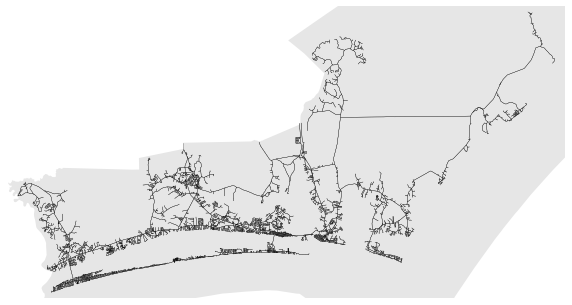

In [7]:
fix, ax = plt.subplots(figsize = (10,20))


def fix_plot(ax):
    for s in ax.spines.values():
        s.set_visible(True)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)


places = ["Carteret County, North Carolina, USA"]

boundary = ox.geocode_to_gdf(places)
ox.plot_footprints(boundary, ax=ax, show=False, color='0.9')

G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G, ax=ax, show=False, node_size = 0, edge_color='black',
              edge_linewidth=0.25)


CarteretDF = incidents.loc[incidents['County']=='Carteret']

ax.scatter(DareDF.Longitude, DareDF.Latitude, zorder=1, alpha= 0.3, c='b', s=15)

fix_plot(ax)


plt.show()